## Imports

In [58]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
plt.rcParams['figure.figsize']=(13, 7)  # tamaño por defecto para los plots

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from xgboost import XGBRegressor

from functions import *

import os
import datetime as dt

from colorama import Fore

#import matplotlib as mpl
#mpl.rcParams.update(mpl.rcParamsDefault)

## Data Cleanning

En primer lugar, tenemos este DataFrame, obtenido de la limpieza de diversas y dispares fuentes de datos, hasta conseguir una línea completa desde al año 1990 hasta la actualidad, tal y como se observa en la celda siguiente:

In [2]:
df=pd.read_csv('ProyectoFinalMensual.csv')
df

Date  Inflation_Index  Brent_Price  Gold_USD  MSCI_World  SPX_value  \
0    1990-10             7.72        36.02    379.50    58415.02     304.00   
1    1990-11             7.83        33.07    384.85    56330.60     322.22   
2    1990-12             7.65        28.27    386.20    58201.46     330.22   
3     1991-1             7.44        23.57    366.00    60491.37     343.93   
4     1991-2             7.22        19.54    362.70    65002.78     367.07   
..       ...              ...          ...       ...         ...        ...   
378   2022-4             9.19       104.58   1911.30   930885.51    4545.86   
379   2022-5             9.66       113.34   1838.70   917250.24    4155.38   
380   2022-6            10.27       122.71   1817.00   864429.84    4101.23   
381   2022-7            10.24       111.93   1753.40   950606.68    3825.33   
382   2022-8            10.26       100.45   1751.25   929278.84    4118.63   

     Interest_Rate  
0             7.46  
1             7.31  
2             6.82  
3             6.59  
4             6.30  
..             ...  
378           0.33  
379           0.83  
380           1.58  
381           2.33  
382           2.33  

[383 rows x 7 columns]

## Visualization

### Visualización

A continuación, procedemos a visualizar de forma individual y colectiva los valores que obtuvimos en el anterior DataFrame.

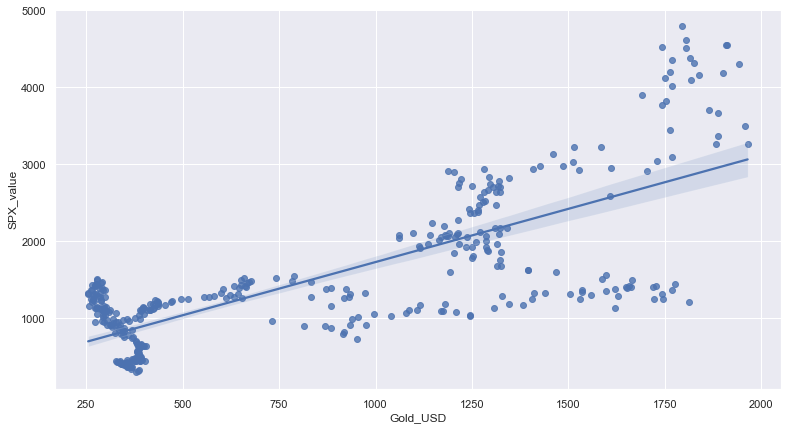

In [3]:
sns.regplot(data=df,
           x='Gold_USD',
           y='SPX_value');

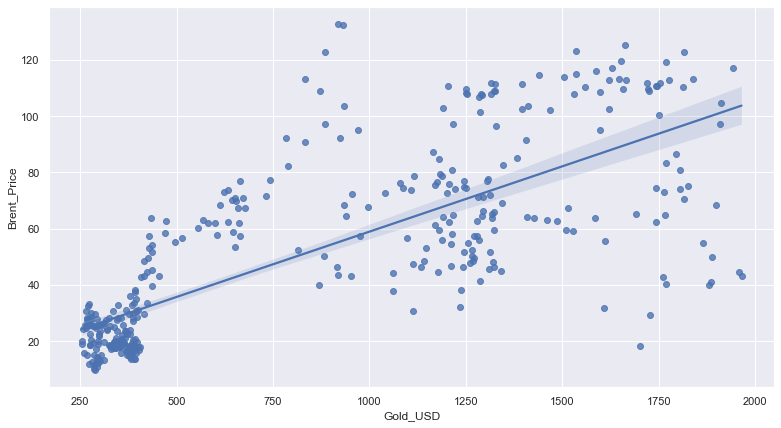

In [4]:
sns.regplot(data=df,
           x='Gold_USD',
           y='Brent_Price');

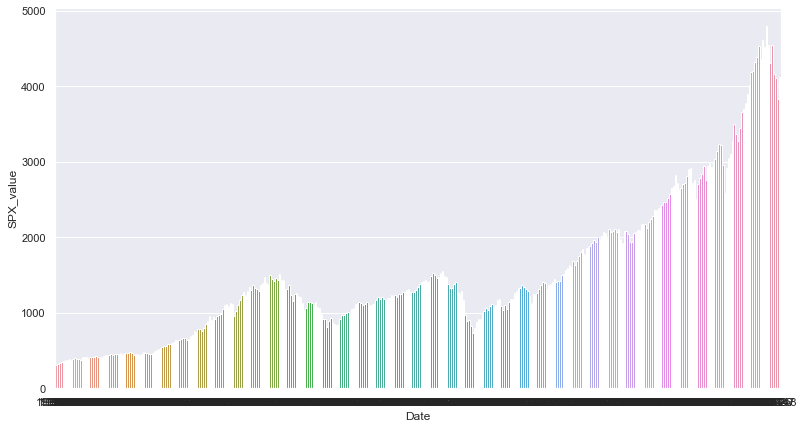

In [5]:
sns.barplot(data=df,
           x='Date',
           y='SPX_value');

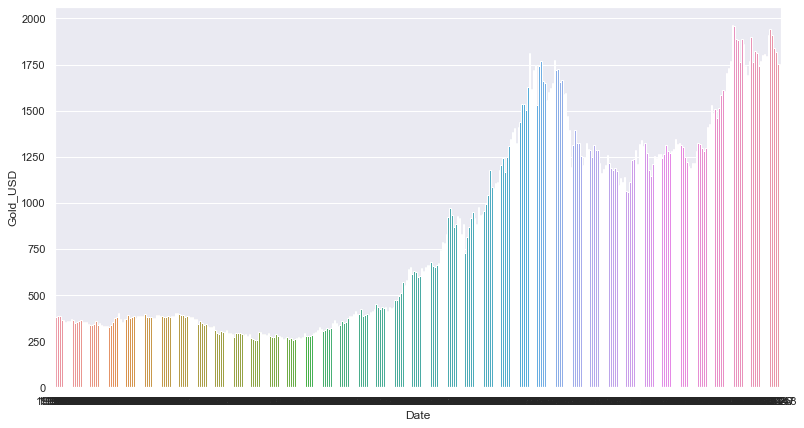

In [6]:
sns.barplot(data=df,
           x='Date',
           y='Gold_USD');

#### Podemos ver una visualización general de la dinámica de estos cuatro valores visualizados.

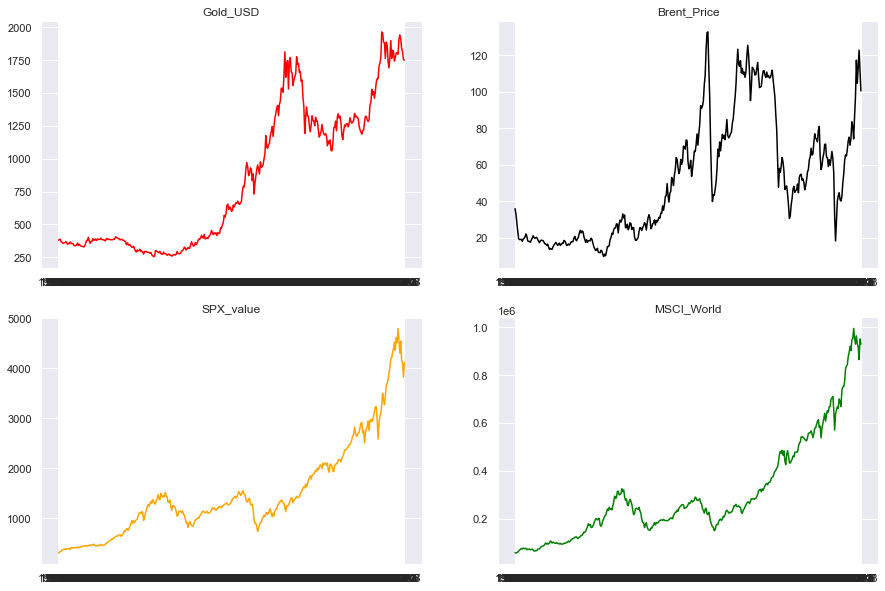

In [7]:
fig = plt.figure(figsize = (15,10))

plt.subplot(2, 2, 1)
plt.plot(df['Date'], df['Gold_USD'], color="red")
plt.title('Gold_USD')

plt.subplot(2, 2, 2)
plt.plot(df['Date'], df['Brent_Price'], color="black")
plt.title('Brent_Price')

plt.subplot(2, 2, 3)
plt.plot(df['Date'], df['SPX_value'], color="orange")
plt.title('SPX_value')

plt.subplot(2, 2, 4)
plt.plot(df['Date'], df['MSCI_World'], color="green")
plt.title('MSCI_World');

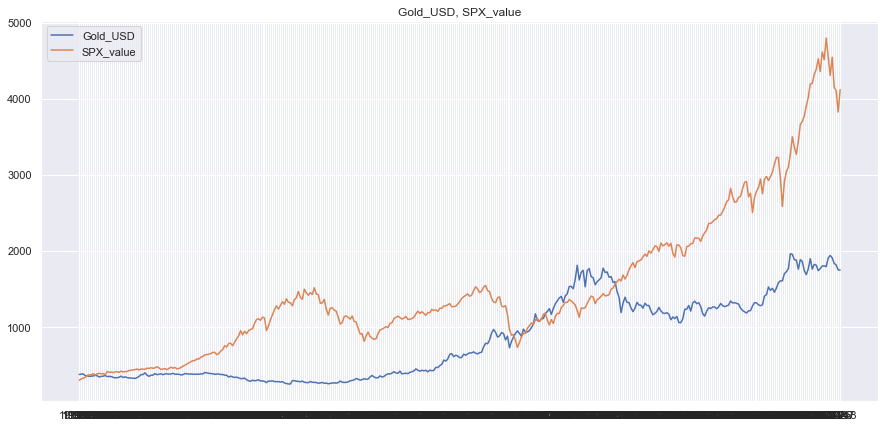

In [8]:
fig = plt.figure(figsize = (15,7))

plt.plot(df['Date'] , df['Gold_USD'])
plt.plot(df['Date'], df['SPX_value'])
plt.title('Gold_USD, SPX_value')
plt.legend(['Gold_USD', 'SPX_value'])

plt.show();

En la primera gráfica, tenemos los valores por separado. Podemos destacar que S&P-500 y MCSI tienen una grafica muy parecida. Esto se debe a que en la composición del MSCI World, el valor del S&P 500 tiene un gran peso específico.

En la segunda gráfica, podemos observar que mientras que el oro ha sido un valor relativamente estable (y de refugio para los inversores), el S&P 500 ha tenido un crecimiento más pronunciado durante las últimas décadas (obviando la caída a raíz de la crisis del COVID)

#### Inflación e interés anual por separado
Para visualizarlo de una forma mas optima, hemos tomado estos dos valores por separado.
Procedemos a hacer una Descomposición Temporal.

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

cierre_descompose = df[["Date", "Interest_Rate"]]

#preparamos el dataframe. Convertimos la columna temporal en index.
cierre_descompose.set_index("Date", inplace=True)

result = seasonal_decompose(cierre_descompose['Interest_Rate'], model='additive', period=12)

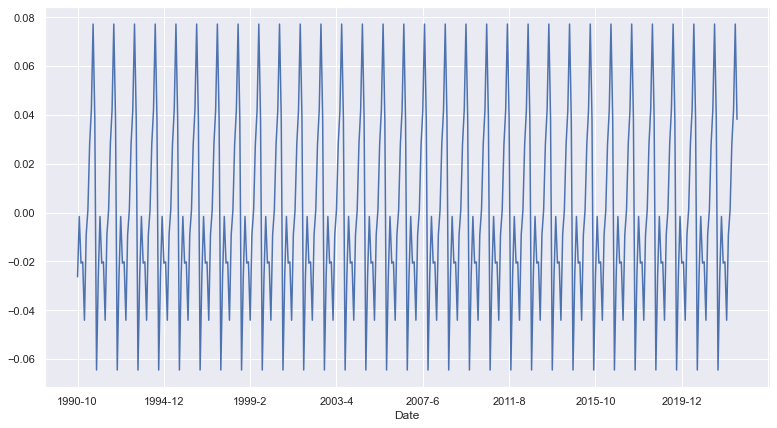

In [10]:
result.seasonal.plot();

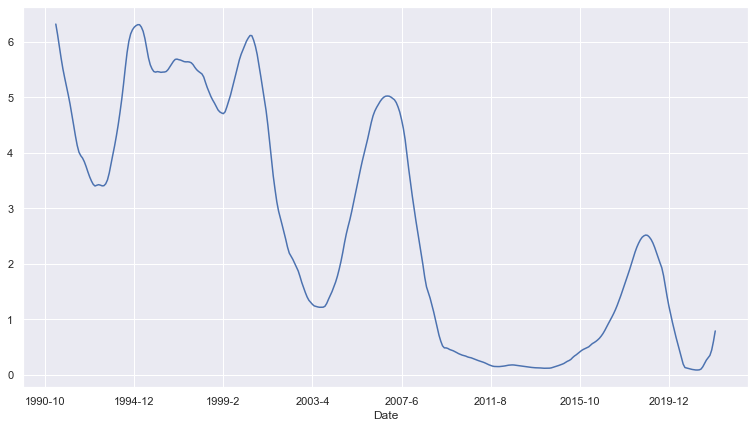

In [11]:
result.trend.plot();

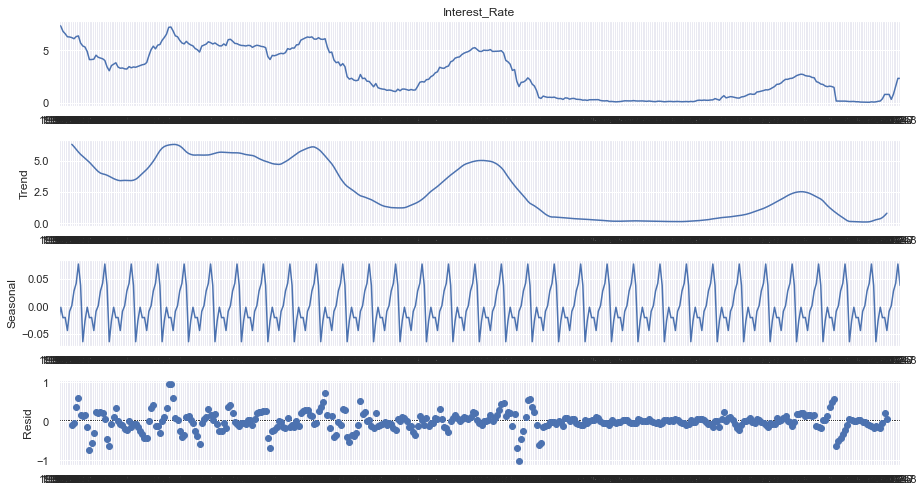

In [12]:
result.plot();

In [13]:
cierre_descompose2 = df[["Date", "Inflation_Index"]]
cierre_descompose2.set_index("Date", inplace=True)

result2 = seasonal_decompose(cierre_descompose2['Inflation_Index'], model='additive', period=12)

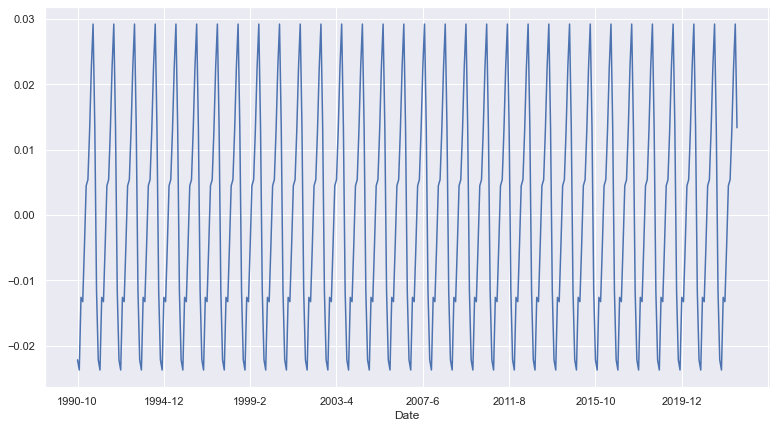

In [14]:
result2.seasonal.plot();

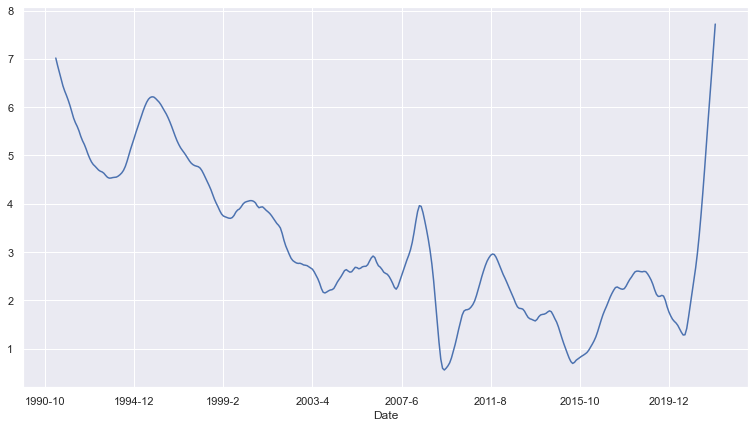

In [15]:
result2.trend.plot();

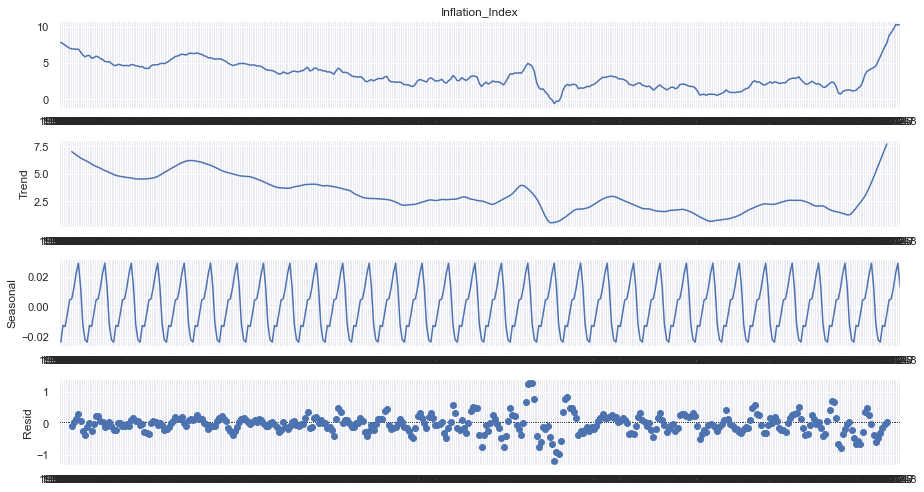

In [16]:
result2.plot();

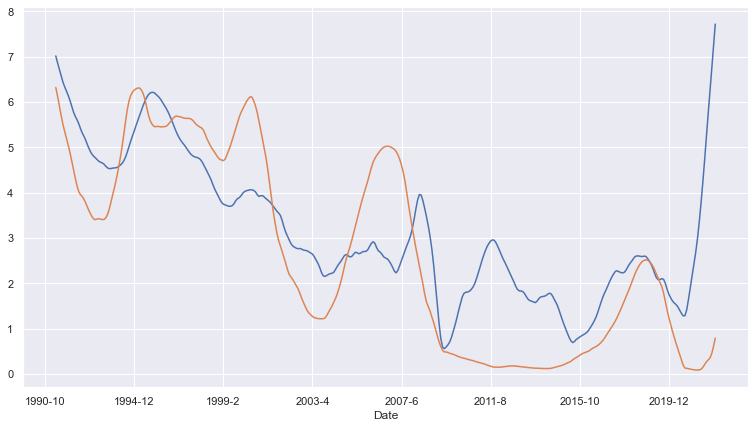

In [17]:
result2.trend.plot();
result.trend.plot();

Así pues, una vez tenemos los datos descompuestos nos es más fácil observar como la tendencia de los tipos de interés y el de la inflación tienen un comportamiento muy similar. Con la salvedad del período especial de 2011 con la bajada de tipos del BCE.
Se puede explicar con la subida del tipo de interes del Banco Central Europeo. 

### Retroceso de Fibonacci

In [18]:
spx=pd.read_csv(r'C:\Users\diego\Documents\Proyecto Final\CSV\SPX.csv')
spx=spx.sort_values(by='Date', ascending=True)

gold=pd.read_csv(r'C:\Users\diego\Documents\Proyecto Final\CSV\GoldClose.csv')
gold=gold[8000:]

brentd=pd.read_csv(r'C:\Users\diego\Documents\Proyecto Final\CSV\BrentDiario.csv')
brentd=brentd[6800:]

Percentage level	 Price
0.00%		 2067.15
23.6		 1826.961
38.2%		 1678.37
50%		 1558.275
61.8%		 1438.18
100.00%		 1049.4


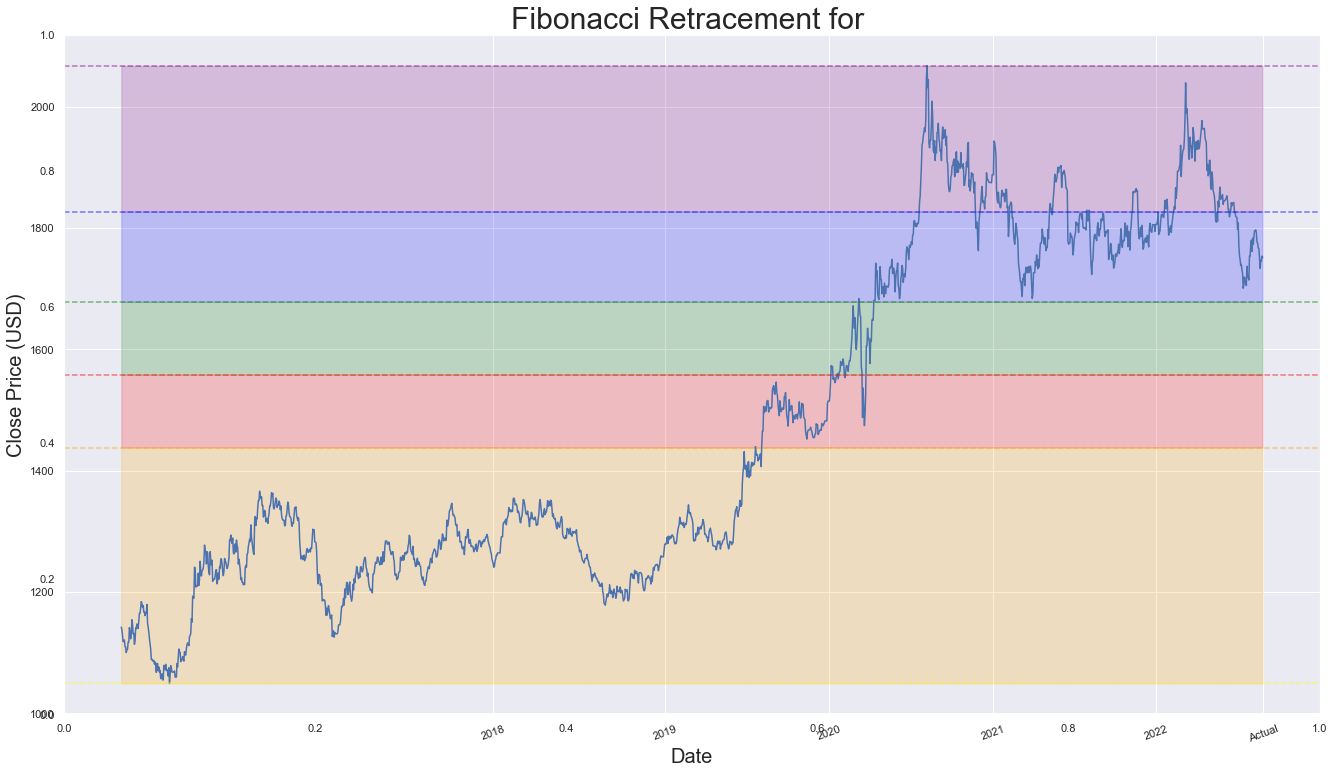

In [19]:
fib_retrace(gold)

El oro establece su barrera de estabilidad en el 65% de la resistencia. Ahora en este punto, podemos decir que los bancos están en una acumulación. Al mas minimo movimiento este valor podría romper la resistencia del 80%.

Percentage level	 Price
0.00%		 133.18
23.6		 103.902
38.2%		 85.789
50%		 71.15
61.8%		 56.511
100.00%		 9.12


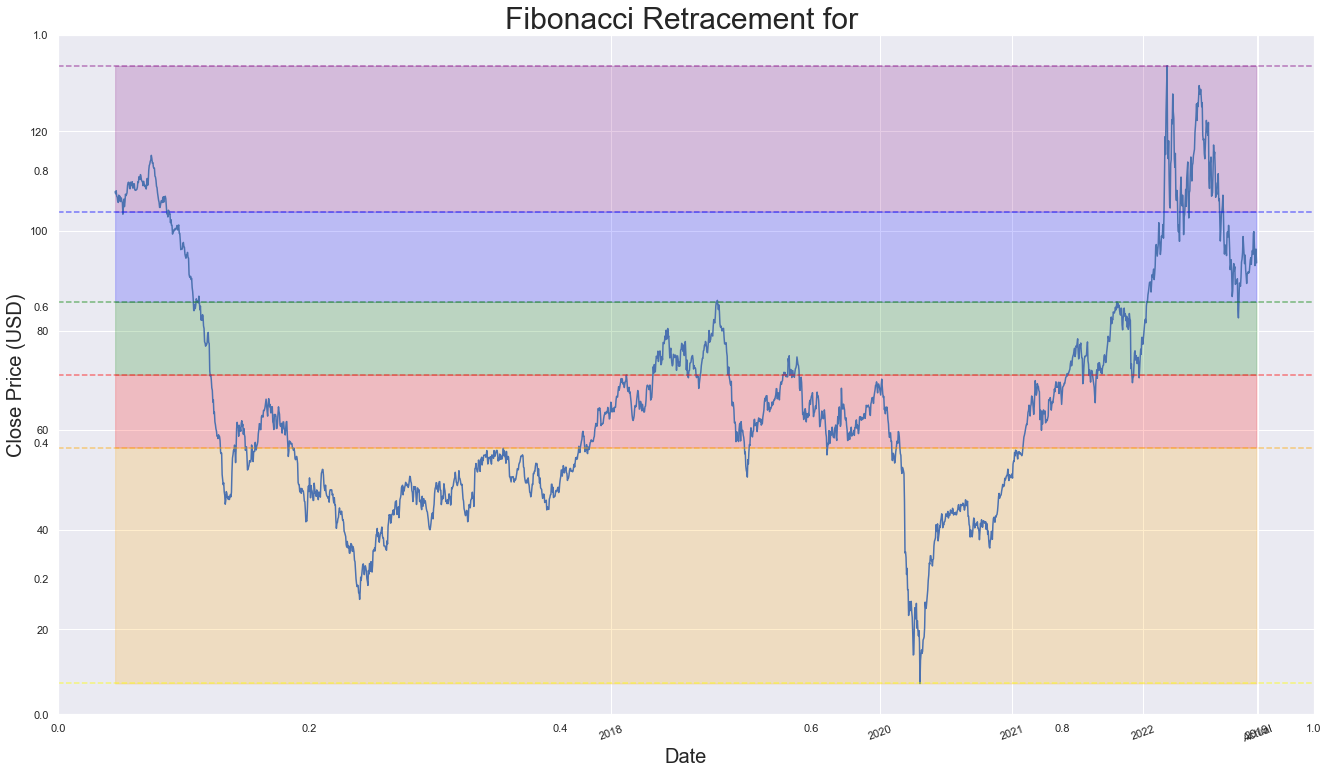

In [20]:
fib_retrace(brentd)

El Brent está en el 65% de la resistencia.
Observamos que el valor se está acomodando, esto se puede deber a que el petróleo esté sobrevalorado, sin embargo, esto lo conoceremos con el transcurso del tiempo y de las tendencias bajistas.

Percentage level	 Price
0.00%		 4796.56
23.6		 4192.598
38.2%		 3818.961
50%		 3516.98
61.8%		 3214.999
100.00%		 2237.4


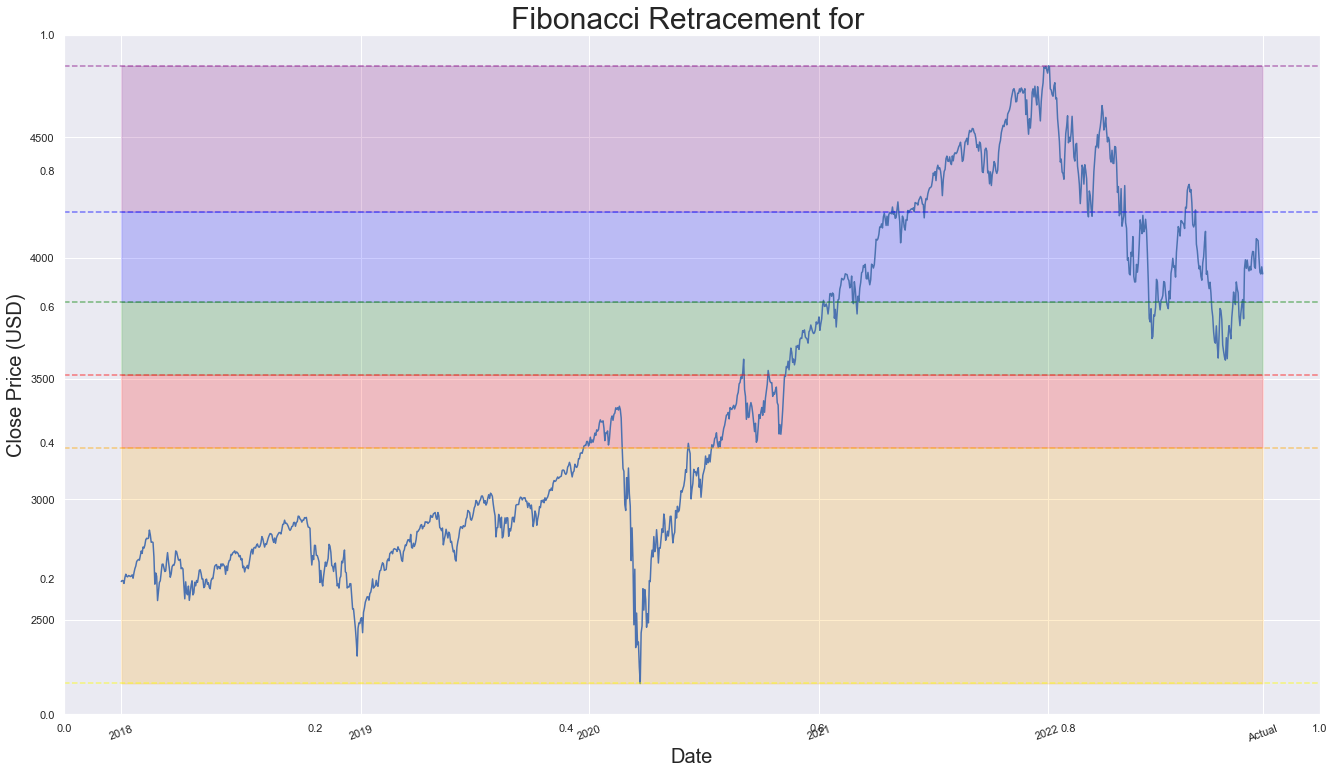

In [21]:
fib_retrace(spx)

El SPX-500 continúa en su escala de recuperación.
El precio superó el nivel 65% del retroceso de Fibonacci, ahora está haciendo un ‘pull back’ hacía este nivel.
Veremos si aguanta por encima de él y lo confirma o bien si se sitúa por debajo y lo vuelve a perder.

Si llegara a consolidar este nivel, por delante le quedaría la prueba definitiva de la remontada

##### Candlestick

In [22]:
spx2=pd.read_csv(r'C:\Users\diego\Documents\Proyecto Final\Mensual-Anual Limpieza Final\SPX.csv')
spx2=spx2[23000:]

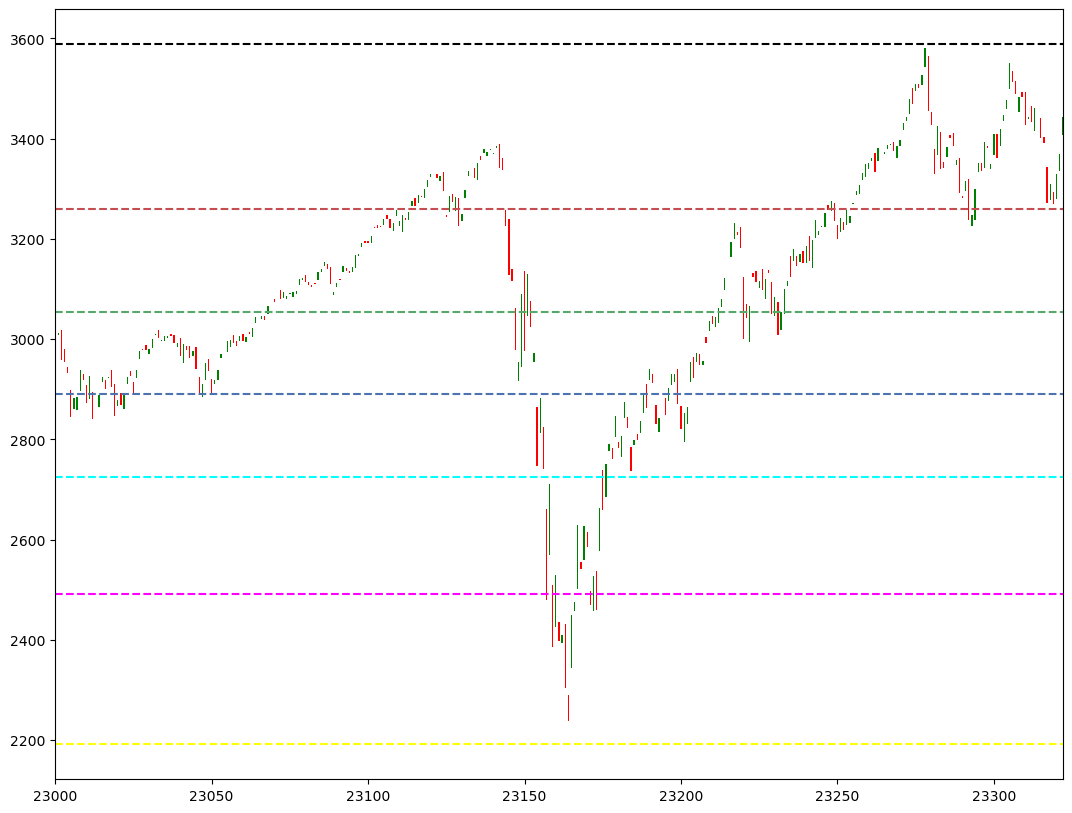

In [59]:
plot_candlestick(spx2)
plot_fibonacci_retracement(spx2)

### 
Al igual que con todos los indicadores técnicos, esta información no debe seguirse a ciegas, pero puede ofrecer una idea de la posible "pseudoaleatoriedad" de la trayectoria del precio, en particular para los activos cíclicos.

La tendencia de valores de centra entre los 2700 y los 3000.
Podemos decir que los valores a futuro pueden establecerse entre los 2800 y los 3200.
Y como vimos, esta predicción se dió.

## Machine Learning

#### Linear Testing 

In [24]:
df = pd.read_csv(r'ProyectoFinalMensual.csv')

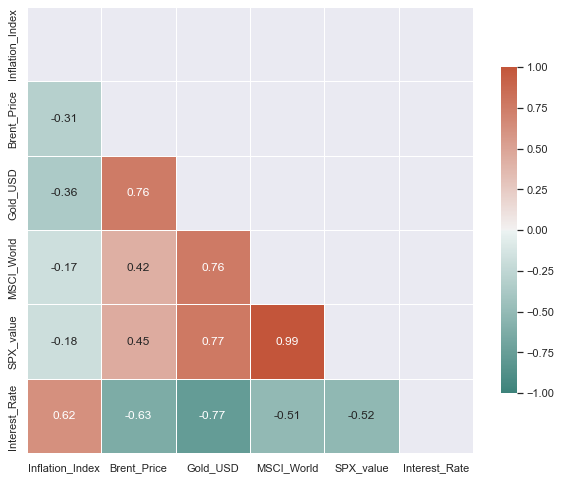

In [25]:
print_corr(df)

##### Observamos que hay correlación entre el tipos de interés y la tasa de inflación, con cierta influencia del precio del oro y el spx-500, por tanto, probamos con estas variables para comprobarlo:

In [26]:
import statsmodels.formula.api as smf

model1 = smf.ols('Inflation_Index ~ Interest_Rate', data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:        Inflation_Index   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     243.9
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           7.63e-43
Time:                        14:41:02   Log-Likelihood:                -687.34
No. Observations:                 383   AIC:                             1379.
Df Residuals:                     381   BIC:                             1387.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.9060      0.118     16.184

In [27]:
features = ['Inflation_Index', 'Brent_Price', 'Gold_USD', 'SPX_value', 'MSCI_World']

orders_standardized = df.copy()
for f in features:
    mu = df[f].mean()
    sigma = df[f].std()
    orders_standardized[f] = df[f].map(lambda x: (x - mu) / sigma)
orders_standardized.head()

Date  Inflation_Index  Brent_Price  Gold_USD  MSCI_World  SPX_value  \
0  1990-10         2.351753    -0.468904 -0.852857   -1.154115  -1.243042   
1  1990-11         2.410668    -0.558499 -0.842905   -1.163868  -1.224233   
2  1990-12         2.314261    -0.704281 -0.840394   -1.155114  -1.215975   
3   1991-1         2.201785    -0.847025 -0.877967   -1.144399  -1.201823   
4   1991-2         2.083953    -0.969421 -0.884105   -1.123289  -1.177936   

   Interest_Rate  
0           7.46  
1           7.31  
2           6.82  
3           6.59  
4           6.30

In [28]:
import statsmodels.formula.api as smf

formula = 'Interest_Rate ~' + '+'.join(features)

model4 = smf.ols(formula=formula, data=orders_standardized).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:          Interest_Rate   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     212.1
Date:                Thu, 15 Dec 2022   Prob (F-statistic):          3.41e-107
Time:                        14:41:04   Log-Likelihood:                -591.66
No. Observations:                 383   AIC:                             1195.
Df Residuals:                     377   BIC:                             1219.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.7056      0.058     

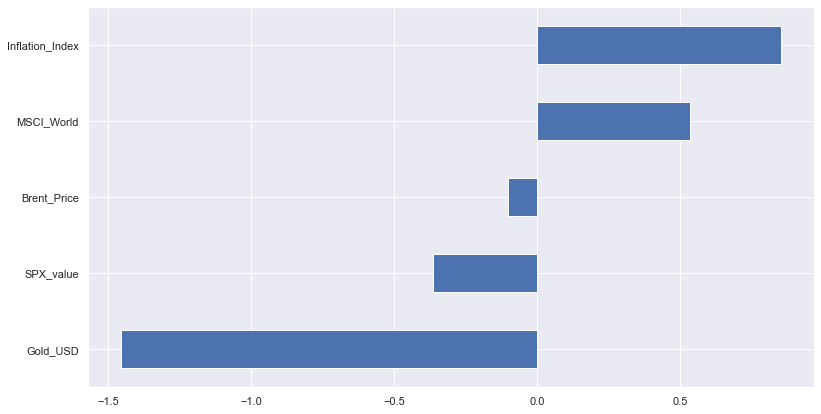

In [29]:
model4.params[1:].sort_values().plot(kind='barh');

In [30]:
from statsmodels.stats.outliers_influence import OLSInfluence
predicted_review_score = model4.predict(orders_standardized[features])

residuals = OLSInfluence(model4).get_resid_studentized_external()

In [31]:
rmse = (residuals**2).mean()**0.5
rmse

1.0002210893351309

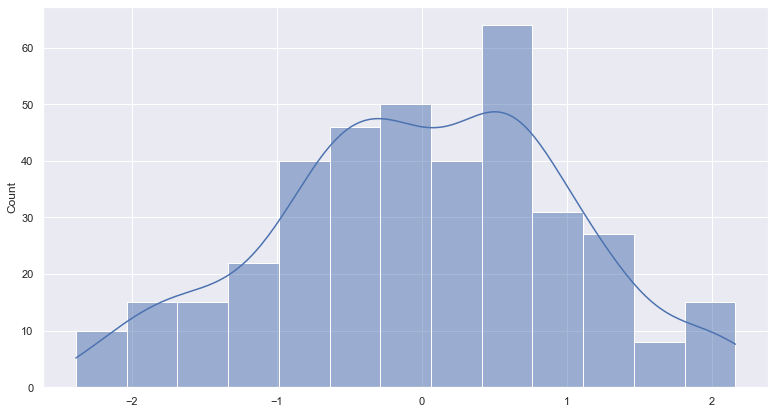

In [32]:
sns.histplot(residuals, kde=True);

In [33]:
features2 = ['Inflation_Index','Gold_USD',]

orders_standardized = df.copy()
for f in features2:
    mu = df[f].mean()
    sigma = df[f].std()
    orders_standardized[f] = df[f].map(lambda x: (x - mu) / sigma)
orders_standardized

Date  Inflation_Index  Brent_Price  Gold_USD  MSCI_World  SPX_value  \
0    1990-10         2.351753        36.02 -0.852857    58415.02     304.00   
1    1990-11         2.410668        33.07 -0.842905    56330.60     322.22   
2    1990-12         2.314261        28.27 -0.840394    58201.46     330.22   
3     1991-1         2.201785        23.57 -0.877967    60491.37     343.93   
4     1991-2         2.083953        19.54 -0.884105    65002.78     367.07   
..       ...              ...          ...       ...         ...        ...   
378   2022-4         3.139082       104.58  1.996350   930885.51    4545.86   
379   2022-5         3.390814       113.34  1.861311   917250.24    4155.38   
380   2022-6         3.717529       122.71  1.820948   864429.84    4101.23   
381   2022-7         3.701461       111.93  1.702650   950606.68    3825.33   
382   2022-8         3.712173       100.45  1.698651   929278.84    4118.63   

     Interest_Rate  
0             7.46  
1             7.31  
2             6.82  
3             6.59  
4             6.30  
..             ...  
378           0.33  
379           0.83  
380           1.58  
381           2.33  
382           2.33  

[383 rows x 7 columns]

In [34]:
import statsmodels.formula.api as smf

formula = 'Interest_Rate ~' + '+'.join(features)

model4 = smf.ols(formula=formula, data=orders_standardized).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:          Interest_Rate   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     212.1
Date:                Thu, 15 Dec 2022   Prob (F-statistic):          3.41e-107
Time:                        14:41:13   Log-Likelihood:                -591.66
No. Observations:                 383   AIC:                             1195.
Df Residuals:                     377   BIC:                             1219.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.6703      0.250     

#### Conclusions

Sin embargo, al quedarnos con los valores que nos interesan, comprobamos que aunque la p es muy baja, el sumario nos indica que podemos estar ante un casa de alta multicolinearidad.

### XGBReressor test. Modelo de estimación de TimeSeries.

#### Con las variables más prometedoraspara probarlas en una regresión son el valor del oro en USD y el precio del Brent, por lo que construimos dos modelos para tratar de predecir ambos valores.:

In [35]:
df=pd.read_csv('ProyectoFinalMensual.csv')

#### Brent Price

In [36]:
closedf = df[['Date','Brent_Price']] #Creamos el dataframe
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (383, 2)


In [37]:
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(383, 1)


In [38]:
training_size=int(len(closedf)*0.70) # Hacemos el "split"
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (268, 1)
test_data:  (115, 1)


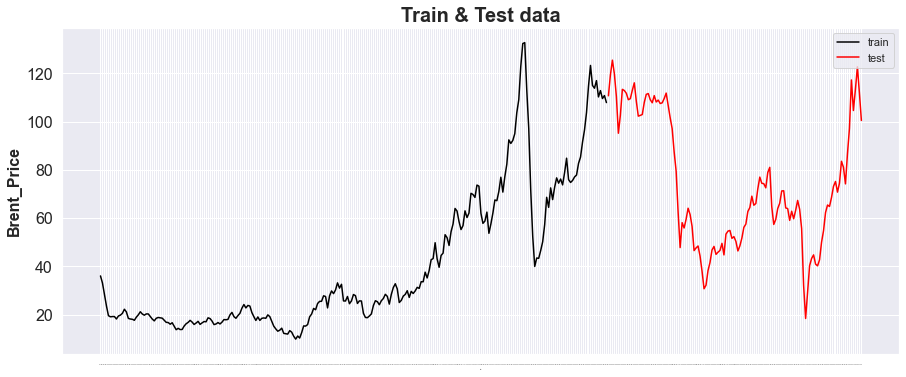

In [39]:
fig, ax = plt.subplots(figsize=(15, 6)) #Observamos como queda de manera gráfica
sns.lineplot(x = df['Date'][:255], y = df['Brent_Price'][:255], color = 'black')
sns.lineplot(x = df['Date'][255:], y = df['Brent_Price'][255:], color = 'red')

# Formatting
ax.set_title('Train & Test data', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Date', fontsize = 1, fontdict=dict())
ax.set_ylabel('Brent_Price', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=1)
plt.legend(loc='upper right' ,labels = ('train', 'test'))
plt.show();

In [40]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]    
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [41]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (252, 15)
y_train:  (252,)
X_test:  (99, 15)
y_test (99,)


In [42]:
from xgboost import XGBRegressor # Importamos el modelo a utilzar
my_model = XGBRegressor(n_estimators=60)
my_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=60, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [43]:
predictions = my_model.predict(X_test)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, predictions)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, predictions))))

Mean Absolute Error - MAE : 0.052962693842631664
Root Mean squared Error - RMSE : 0.0750869691007712


In [44]:
train_predict=my_model.predict(X_train)
test_predict=my_model.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (252, 1)
Test data prediction: (99, 1)


In [45]:
train_predict = scaler.inverse_transform(train_predict) # Escalamos
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [46]:
# PLOTTING

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': df['Date'],
                       'original_price': df['Brent_Price'],
                      'train_predicted_price': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_price': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_price'],plotdf['train_predicted_price'],
                                          plotdf['test_predicted_price']],
              labels={'value':'Brent Price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Brent Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show();

Train predicted data:  (383, 1)
Test predicted data:  (383, 1)


### Conclusion

El error es minimo, pero vemos indicios de que podriamos tener overfit ya que el modelo se solapa con el modelo original en la parte del test.
Con unas tendencias a futuro son dispares.

### Gold Value in USD

In [47]:
closedf2 = df[['Date','Gold_USD']] #Creamos el dataframe
print("Shape of close dataframe:", closedf2.shape)

Shape of close dataframe: (383, 2)


In [48]:
del closedf2['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf2=scaler.fit_transform(np.array(closedf2).reshape(-1,1))
print(closedf2.shape)

(383, 1)


In [49]:
training_size=int(len(closedf2)*0.70) # Hacemos el "split"
test_size=len(closedf2)-training_size
train_data,test_data=closedf2[0:training_size,:],closedf2[training_size:len(closedf2),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (268, 1)
test_data:  (115, 1)


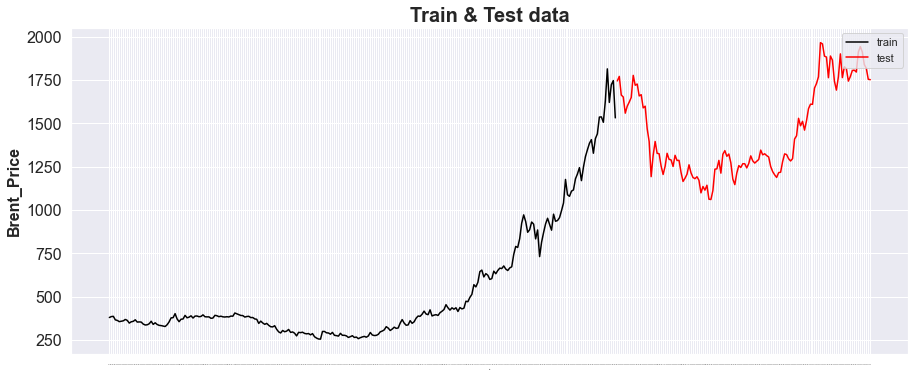

In [50]:
fig, ax = plt.subplots(figsize=(15, 6)) #Observamos como queda de manera gráfica
sns.lineplot(x = df['Date'][:255], y = df['Gold_USD'][:255], color = 'black')
sns.lineplot(x = df['Date'][255:], y = df['Gold_USD'][255:], color = 'red')

# Formatting
ax.set_title('Train & Test data', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Date', fontsize = 1, fontdict=dict())
ax.set_ylabel('Brent_Price', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=1)
plt.legend(loc='upper right' ,labels = ('train', 'test'))
plt.show();

In [51]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]    
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [52]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (252, 15)
y_train:  (252,)
X_test:  (99, 15)
y_test (99,)


In [53]:
from xgboost import XGBRegressor # Importamos el modelo a utilzar
my_model = XGBRegressor(n_estimators=60)
my_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=60, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [54]:
predictions = my_model.predict(X_test)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, predictions)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, predictions))))

Mean Absolute Error - MAE : 0.15964829652571902
Root Mean squared Error - RMSE : 0.1779859137608266


In [55]:
train_predict=my_model.predict(X_train)
test_predict=my_model.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (252, 1)
Test data prediction: (99, 1)


In [56]:
train_predict = scaler.inverse_transform(train_predict) # Escalamos
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [57]:
# PLOTTING

look_back=time_step
trainPredictPlot = np.empty_like(closedf2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

testPredictPlot = np.empty_like(closedf2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf2)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': df['Date'],
                       'original_value': df['Gold_USD'],
                      'train_predicted_value': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_value': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_value'],plotdf['train_predicted_value'],
                                          plotdf['test_predicted_value']],
              labels={'value':'Gold in USD','date': 'Date'})
fig.update_layout(title_text='Comparision between original close value vs predicted close value',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Gold Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show();

Train predicted data:  (383, 1)
Test predicted data:  (383, 1)


### Conclusión

En este caso, el modelo se nos hace deficiente, ya que no cuenta con los datos y variables adecuados para predecir las tendencias.

Rusia está vendiendo el barril de petróleo a 60 dolares, que es aproximadamente el precio del gramo de oro. Esto puede provocar que vendan dos barriles por gramo de oro por lo que podríamos tener acumulación y, por tanto, incremento del valor del oro. 
Con lo cual puede que estemos ante una predisposición alcista, tal y como indican los modelos.

### Conclusión Final.

Así pues, a lo largo de este proyecto, hemos estudiado la relación que se establece entre estas variables, así como, esta nos puede servir para aproximar el comportamiento que estos valores pueden tener.

Los siguientes pasos estarían enfocados a mejorar los modelos predictivos mediante un aumento de la base de datos, además de una profundización en el algoritmo, para así adaptarlo a nuestros datos.